This notebook is for Exploratory Data Analysis (EDA) and visualizes historical NFL team performance data (2003–2023).

**Goals:**
- Understand the distribution of key performance metrics.
- Identify trends, outliers, and relationships between features.
- Guide feature selection for predictive modeling using correlation analysis.

**Tools:**
- pandas, seaborn, matplotlib

Importing libraries: 
- Pandas for Data Manipulation
- Matplotlib and Seaborn for plotting

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

Loading the dataset and display first couple rows to check for sucessful upload

In [3]:
df = pd.read_csv('../data/processed/nfl_team_stats_2003_2023_cleaned.csv')

df.head()

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,total_yards,plays_offense,yds_per_play_offense,turnovers,fumbles_lost,first_down,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_net_yds_per_att,pass_fd,rush_att,rush_yds,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,5039,1042,4.8,24,11,294,320,537,3432,23,13,6.0,177,473,1607,9,3.4,91,111,998,26,27.9,11.3,-136.51,NaN
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,4609,968,4.8,34,15,266,257,450,2792,17,19,5.8,145,487,1817,14,3.7,99,103,913,22,28.1,17.2,-177.92,NaN
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,4348,980,4.4,34,17,268,293,502,2684,11,17,4.9,150,427,1664,13,3.9,96,106,891,22,21.9,17.6,-230.07,NaN
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,4951,936,5.3,20,6,274,312,496,3316,20,14,6.3,181,409,1635,8,4.0,78,69,550,15,32.4,11.8,-107.89,NaN
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,4929,1009,4.9,38,19,259,217,415,2255,16,19,4.9,121,552,2674,18,4.8,115,126,970,23,31.8,16.6,-220.50,NaN


Check for types of information in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  672 non-null    int64  
 1   team                  672 non-null    object 
 2   wins                  672 non-null    int64  
 3   losses                672 non-null    int64  
 4   win_loss_perc         672 non-null    float64
 5   points                672 non-null    int64  
 6   points_opp            672 non-null    int64  
 7   points_diff           672 non-null    int64  
 8   mov                   352 non-null    float64
 9   g                     672 non-null    int64  
 10  total_yards           672 non-null    int64  
 11  plays_offense         672 non-null    int64  
 12  yds_per_play_offense  672 non-null    float64
 13  turnovers             672 non-null    int64  
 14  fumbles_lost          672 non-null    int64  
 15  first_down            6

Check for Summary statistics for numerical columns. To give an idea of quality distrubution.

In [5]:
df.describe()

,year,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,total_yards,plays_offense,yds_per_play_offense,turnovers,fumbles_lost,first_down,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_net_yds_per_att,pass_fd,rush_att,rush_yds,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,352.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,320.000000
mean,2013.000000,8.050595,8.050595,0.500246,358.633929,358.633929,0.000000,-0.001136,16.139881,5463.895833,1021.910714,5.340476,24.708333,10.062500,314.375000,339.305060,546.882440,3616.974702,23.580357,14.645833,6.187649,186.709821,437.812500,1846.921131,13.462798,4.199554,99.775298,101.494048,849.501488,27.889881,34.093304,12.561756,-35.937113,0.081250
std,6.059811,3.093255,3.086020,0.191452,72.092050,57.889328,100.684601,6.313288,0.347122,628.209466,51.207049,0.507939,6.604748,3.517759,38.462041,50.645939,61.830229,618.130242,7.579648,4.775388,0.785266,31.236190,51.825202,343.221633,5.170285,0.440718,20.837354,16.145851,146.167034,7.251892,6.730800,3.206515,120.556255,0.273647
min,2003.000000,0.000000,0.000000,0.000000,168.000000,201.000000,-261.000000,-16.300000,16.000000,3587.000000,865.000000,3.900000,8.000000,2.000000,191.000000,204.000000,358.000000,1898.000000,7.000000,2.000000,4.100000,96.000000,304.000000,1129.000000,2.000000,3.100000,53.000000,55.000000,415.000000,9.000000,16.400000,4.000000,-358.270000,0.000000
25%,2008.000000,6.000000,6.000000,0.375000,305.000000,316.750000,-75.000000,-4.700000,16.000000,5030.250000,990.000000,5.000000,20.000000,8.000000,288.000000,303.000000,506.750000,3156.250000,18.000000,11.000000,5.700000,163.000000,401.000000,1606.000000,10.000000,3.900000,84.000000,91.000000,751.750000,23.000000,29.200000,10.200000,-124.015000,0.000000
50%,2013.000000,8.000000,8.000000,0.500000,359.000000,356.500000,-1.000000,0.000000,16.000000,5467.500000,1019.000000,5.300000,24.000000,10.000000,313.000000,339.000000,546.000000,3592.500000,23.000000,14.000000,6.100000,186.000000,433.500000,1810.000000,13.000000,4.200000,98.000000,102.000000,852.500000,27.000000,33.900000,12.400000,-40.970000,0.000000
75%,2018.000000,10.000000,10.000000,0.625000,406.000000,398.000000,75.250000,4.625000,16.000000,5900.250000,1053.000000,5.700000,29.000000,12.000000,340.000000,372.000000,590.000000,4047.500000,28.000000,18.000000,6.800000,208.000000,472.000000,2047.250000,17.000000,4.500000,112.250000,112.000000,941.250000,33.000000,38.800000,14.800000,49.795000,0.000000
max,2023.000000,16.000000,16.000000,1.000000,606.000000,519.000000,315.000000,19.700000,17.000000,7474.000000,1191.000000,6.800000,46.000000,26.000000,444.000000,499.000000,751.000000,5444.000000,55.000000,32.000000,8.500000,293.000000,618.000000,3296.000000,32.000000,5.500000,188.000000,163.000000,1358.000000,50.000000,52.700000,25.000000,298.140000,1.000000


Check for any null values

In [6]:
df.isnull().sum().sort_values(ascending=False)

ties                    352
mov                     320
year                      0
wins                      0
team                      0
points                    0
losses                    0
points_opp                0
points_diff               0
g                         0
win_loss_perc             0
plays_offense             0
yds_per_play_offense      0
turnovers                 0
fumbles_lost              0
first_down                0
pass_cmp                  0
pass_att                  0
total_yards               0
pass_yds                  0
pass_td                   0
pass_net_yds_per_att      0
pass_int                  0
rush_att                  0
rush_yds                  0
rush_td                   0
pass_fd                   0
rush_yds_per_att          0
rush_fd                   0
penalties_yds             0
penalties                 0
pen_fd                    0
score_pct                 0
turnover_pct              0
exp_pts_tot               0
dtype: int64

PLotting viusals for Histogram of win-loss percentages. This should give an idea of skewness or balance in team performances.

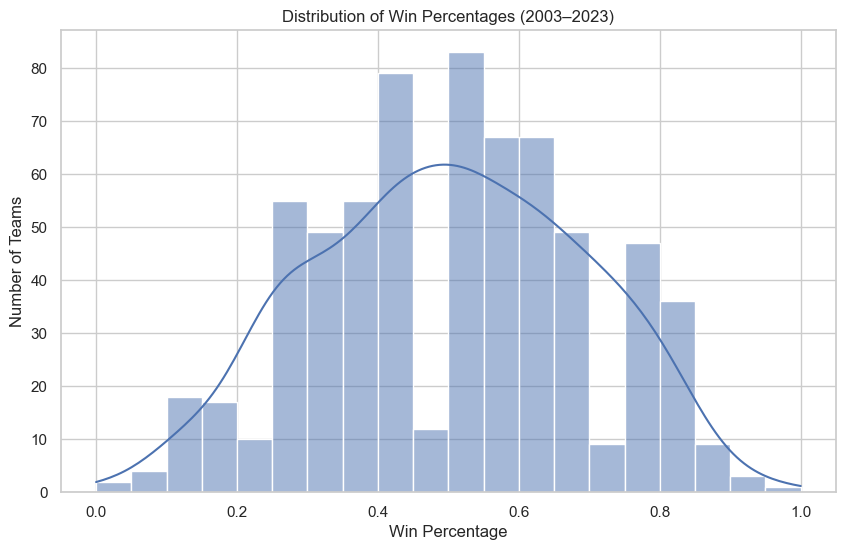

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['win_loss_perc'], bins=20, kde=True)
plt.title('Distribution of Win Percentages (2003–2023)')
plt.xlabel('Win Percentage')
plt.ylabel('Number of Teams')
plt.show()


PLotting viusals for Heat Correaltion Maps. This should give an idea of which varibales are positively and negatively related.

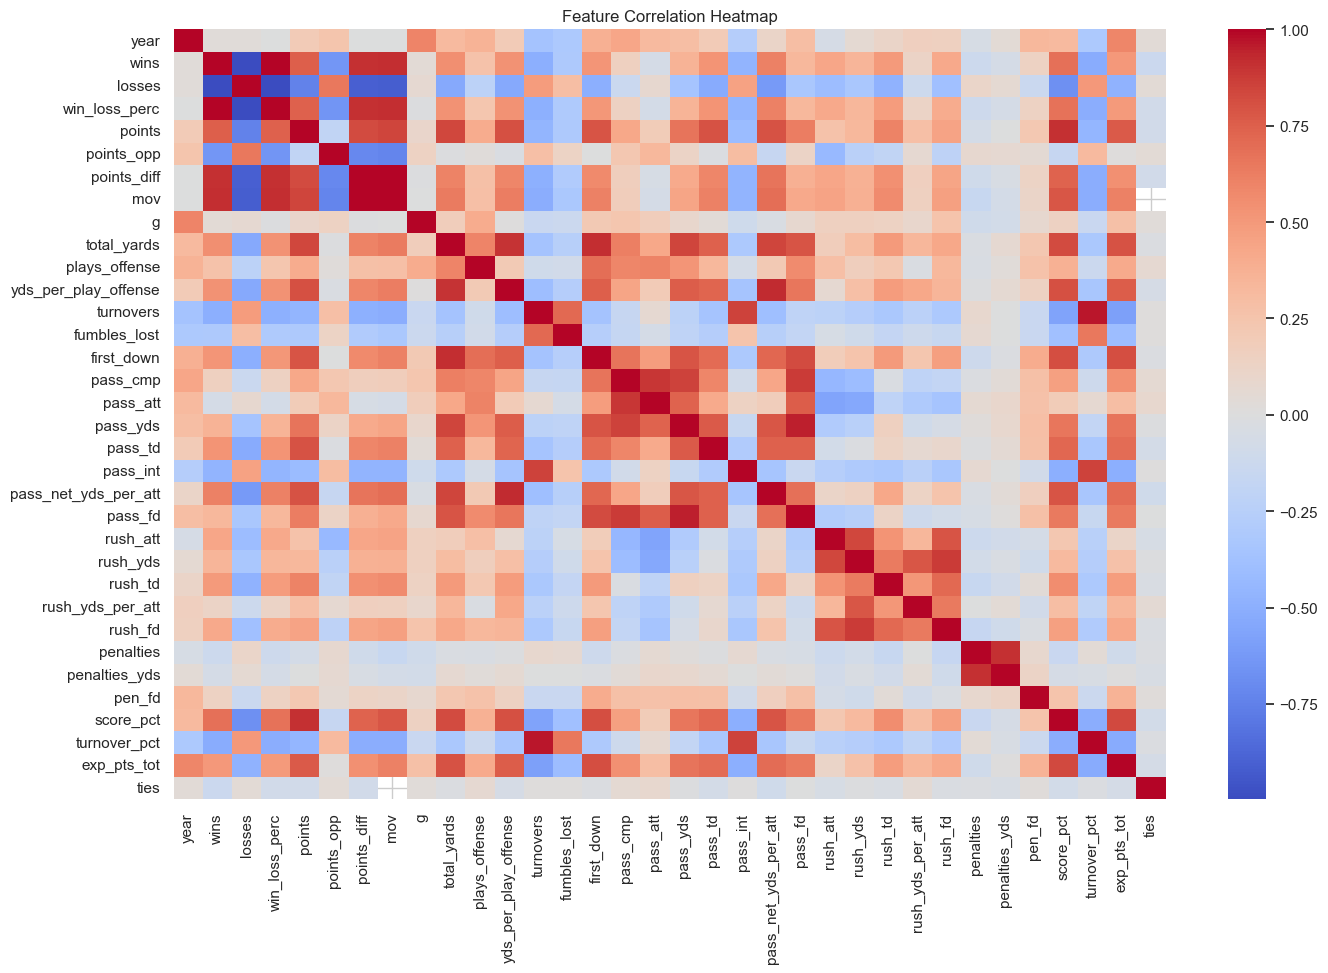

In [8]:
plt.figure(figsize=(16, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


This is to show the top teams for the years between 2003-2023

In [9]:
top_teams = df.sort_values(by='win_loss_perc', ascending=False).head(10)
top_teams[['year', 'team', 'wins', 'losses', 'win_loss_perc']]

,year,team,wins,losses,win_loss_perc
128,2007,New England Patriots,16,0,1.000
36,2004,Pittsburgh Steelers,15,1,0.938
276,2011,Green Bay Packers,15,1,0.938
408,2015,Carolina Panthers,15,1,0.938
416,2016,New England Patriots,14,2,0.875
516,2019,Baltimore Ravens,14,2,0.875
72,2005,Indianapolis Colts,14,2,0.875
32,2004,New England Patriots,14,2,0.875
200,2009,Indianapolis Colts,14,2,0.875
108,2006,San Diego Chargers,14,2,0.875


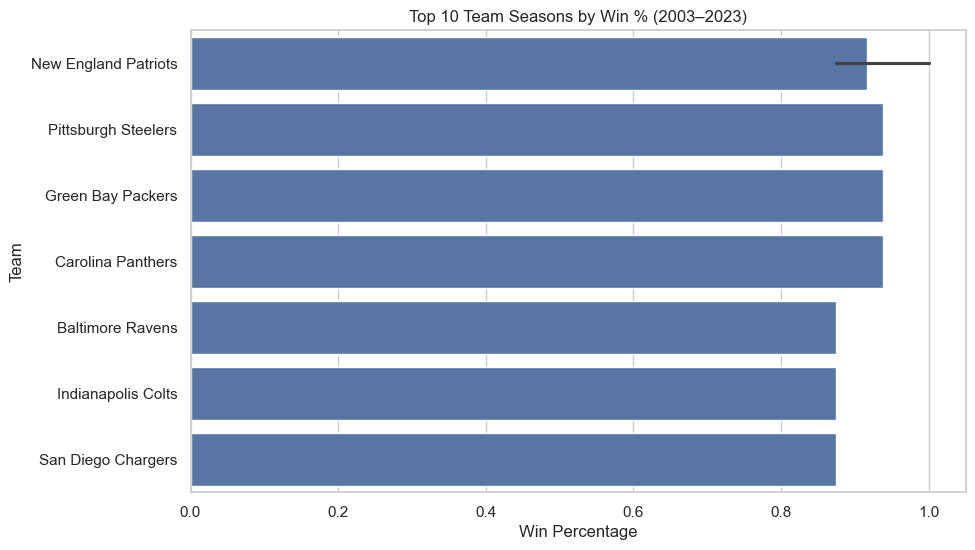

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_teams, x='win_loss_perc', y='team')
plt.title("Top 10 Team Seasons by Win % (2003–2023)")
plt.xlabel("Win Percentage")
plt.ylabel("Team")
plt.show()

In [11]:
df.columns.tolist()

['year',
 'team',
 'wins',
 'losses',
 'win_loss_perc',
 'points',
 'points_opp',
 'points_diff',
 'mov',
 'g',
 'total_yards',
 'plays_offense',
 'yds_per_play_offense',
 'turnovers',
 'fumbles_lost',
 'first_down',
 'pass_cmp',
 'pass_att',
 'pass_yds',
 'pass_td',
 'pass_int',
 'pass_net_yds_per_att',
 'pass_fd',
 'rush_att',
 'rush_yds',
 'rush_td',
 'rush_yds_per_att',
 'rush_fd',
 'penalties',
 'penalties_yds',
 'pen_fd',
 'score_pct',
 'turnover_pct',
 'exp_pts_tot',
 'ties']